In [1]:
library(DESeq2)
library(ggplot2)
library(tidyr)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

## Load data

In [2]:
list.files("../../results/DiffExpr/pseudobulks/")

[1] "annotation_chimp.csv"              "annotation_human.csv"             
[3] "annotation_macaque.csv"            "annotation_spatial_libd_human.csv"
[5] "expression_chimp.csv"              "expression_human.csv"             
[7] "expression_macaque.csv"            "expression_spatial_libd_human.csv"

### Expression table

In [3]:
expression_human <- read.csv('../../results/DiffExpr/pseudobulks/expression_human.csv')
head(expression_human)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.human_j4,L1.human_j4,L6.human_j4,WM.human_j6,L2.human_j6,L3.human_j6,L5.human_j6,L6.human_j6,L1.human_j6,L4.human_j6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,OR4F29,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F16,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,SAMD11,1,4,1,4,6,4,0,9,5,⋯,1,5,0,0,0,1,7,0,0,4
5,NOC2L,25,75,75,217,37,94,91,115,414,⋯,156,48,82,62,43,163,361,145,18,205
6,KLHL17,5,31,12,61,14,30,35,40,179,⋯,23,6,20,13,10,49,81,43,1,42


In [4]:
expression_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/expression_spatial_libd_human.csv')
head(expression_human_libd)

,X,L1.151507,L3.151507,WM.151507,L6.151507,L5.151507,L2.151507,L4.151507,L3.151508,L1.151508,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,1,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,AL627309.1,2,1,0,0,1,0,2,1,1,⋯,0,1,1,2,1,0,0,2,1,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Merge two tables

In [5]:
expression = merge(expression_human, expression_human_libd, by='X')
head(expression)

,X,WM.human_759,L5.human_759,L2.human_759,L3.human_759,L1.human_759,L6.human_759,L4.human_759,WM.human_j12,L3.human_j12,⋯,L2.151675,L4.151675,L6.151675,L3.151676,L1.151676,WM.151676,L6.151676,L5.151676,L2.151676,L4.151676
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,48,106,183,517,72,171,207,90,481,⋯,46,27,54,116,14,110,59,78,52,37
2,A1CF,0,0,1,13,1,0,0,0,5,⋯,0,0,0,0,0,0,0,0,0,0
3,A2M,107,207,173,564,282,248,256,226,360,⋯,139,101,172,401,98,210,209,321,107,113
4,A2ML1,1,1,4,3,5,1,7,1,1,⋯,1,1,0,2,0,4,0,3,0,0
5,A3GALT2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A4GALT,0,0,4,11,2,1,2,4,3,⋯,5,2,1,9,1,3,5,7,6,1


In [6]:
nrow(expression)

[1] 19404

### Annotation table

In [7]:
annotation_human <- read.csv('../../results/DiffExpr/pseudobulks/annotation_human.csv', row.names=1)
head(annotation_human)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human
L3.human_759,L3,human_759,human
L1.human_759,L1,human_759,human
L6.human_759,L6,human_759,human


In [8]:
annotation_human_libd <- read.csv('../../results/DiffExpr/pseudobulks/annotation_spatial_libd_human.csv', row.names=1)
head(annotation_human_libd)

,layer,sample_id,condition
,<chr>,<int>,<chr>
L1.151507,L1,151507,spatial_libd_human
L3.151507,L3,151507,spatial_libd_human
WM.151507,WM,151507,spatial_libd_human
L6.151507,L6,151507,spatial_libd_human
L5.151507,L5,151507,spatial_libd_human
L2.151507,L2,151507,spatial_libd_human


In [9]:
annotation = rbind(annotation_human, annotation_human_libd)
head(annotation, 3)
tail(annotation, 3)

,layer,sample_id,condition
,<chr>,<chr>,<chr>
WM.human_759,WM,human_759,human
L5.human_759,L5,human_759,human
L2.human_759,L2,human_759,human


,layer,sample_id,condition
,<chr>,<chr>,<chr>
L5.151676,L5,151676,spatial_libd_human
L2.151676,L2,151676,spatial_libd_human
L4.151676,L4,151676,spatial_libd_human


## L1

### Subset L1

In [10]:
layer <- "L1"
ann_L1 <- annotation[annotation$layer == layer, ]
ann_L1$condition <- factor(ann_L1$condition, levels=c("human", "spatial_libd_human"))
ann_L1$condition <- relevel(ann_L1$condition, ref="spatial_libd_human")
head(ann_L1)

,layer,sample_id,condition
,<chr>,<chr>,<fct>
L1.human_759,L1,human_759,human
L1.human_j12,L1,human_j12,human
L1.human_j3,L1,human_j3,human
L1.human_j4,L1,human_j4,human
L1.human_j6,L1,human_j6,human
L1.151507,L1,151507,spatial_libd_human


In [11]:
expr_L1 <- expression[, rownames(ann_L1)]
rownames(expr_L1) <- expression$X
group <- ann_L1$condition
head(expr_L1)

,L1.human_759,L1.human_j12,L1.human_j3,L1.human_j4,L1.human_j6,L1.151507,L1.151508,L1.151509,L1.151510,L1.151673,L1.151674,L1.151675,L1.151676
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,72,48,21,60,9,58,35,73,76,13,48,8,14
A1CF,1,0,0,2,0,0,0,0,0,0,0,0,0
A2M,282,72,46,58,79,180,200,296,286,78,206,60,98
A2ML1,5,0,0,0,0,3,9,8,3,1,2,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,2,3,0,0,2,4,7,11,5,1,7,3,1


In [12]:
dds <- DESeqDataSetFromMatrix(countData = round(expr_L1),
                              colData = ann_L1,
                              design = ~ condition)
dds

converting counts to integer mode



class: DESeqDataSet 
dim: 19404 13 
metadata(1): version
assays(1): counts
rownames(19404): A1BG A1CF ... ZYX ZZEF1
rowData names(0):
colnames(13): L1.human_759 L1.human_j12 ... L1.151675 L1.151676
colData names(3): layer sample_id condition

### Filtering

In [13]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

### DE

In [19]:
dds <- DESeq(dds)
res <- results(dds)
res

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): condition human vs spatial libd human 
Wald test p-value: condition human vs spatial libd human 
DataFrame with 14488 rows and 6 columns
        baseMean log2FoldChange     lfcSE      stat      pvalue       padj
       <numeric>      <numeric> <numeric> <numeric>   <numeric>  <numeric>
A1BG    32.36245      0.0264937  0.249321  0.106263   0.9153737  0.9468345
A2M    130.14977     -0.6965475  0.283175 -2.459777   0.0139023  0.0369131
A2ML1    1.77906     -1.8360810  1.045624 -1.755968   0.0790939  0.1519124
A4GALT   3.09796     -1.7806375  0.708405 -2.513586   0.0119511  0.0325501
AAAS    12.32829      0.0612798  0.298835  0.205062   0.8375238  0.8945617
...          ...            ...       ...       ...         ...        ...
ZXDB     9.72175       0.675662  0.326039  2.072335 0.038234248 0.08450061
ZXDC     4.82508      -0.392445  0.487577 -0.804888 0.420884193 0.54958683
ZYG11B  80.58295       0.637203  0.179063  3.558552 0.000372905 0.00163818
ZYX     50.270

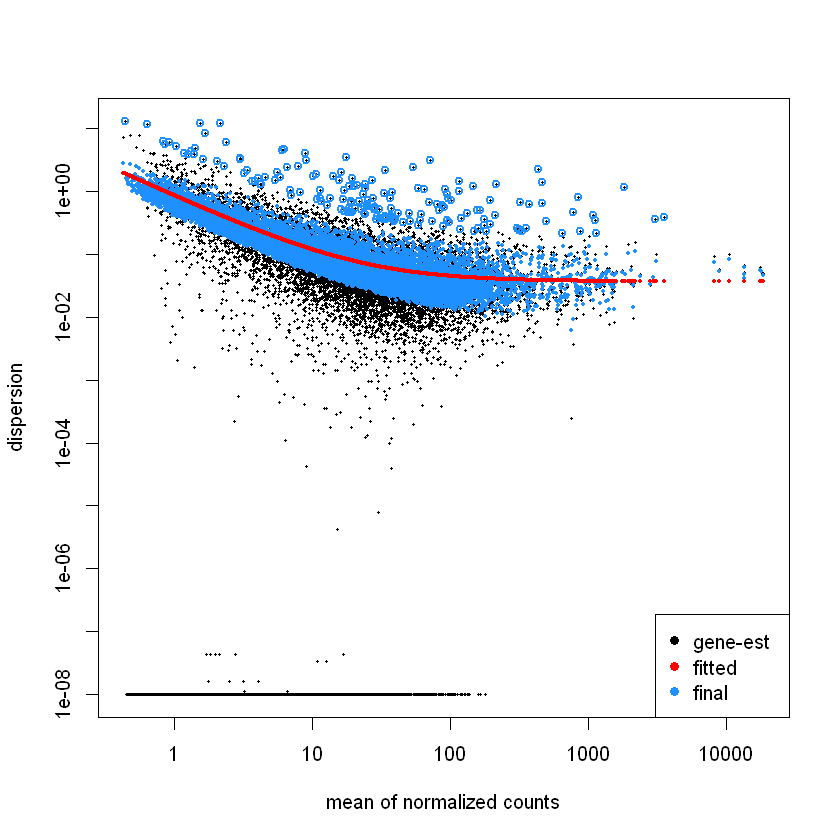

In [31]:
plotDispEsts(dds)

In [20]:
summary(res)


out of 14488 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3241, 22%
LFC < 0 (down)     : 3570, 25%
outliers [1]       : 12, 0.083%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [23]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 6811

In [24]:
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 14488 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 2772, 19%
LFC < 0 (down)     : 3049, 21%
outliers [1]       : 12, 0.083%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### Log fold change shrinkage for visualization and ranking

In [21]:
resultsNames(dds)

[1] "Intercept"                            
[2] "condition_human_vs_spatial_libd_human"

In [22]:
resLFC <- lfcShrink(dds, coef="condition_human_vs_spatial_libd_human", type="apeglm")
resLFC

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



log2 fold change (MAP): condition human vs spatial libd human 
Wald test p-value: condition human vs spatial libd human 
DataFrame with 14488 rows and 5 columns
        baseMean log2FoldChange     lfcSE      pvalue       padj
       <numeric>      <numeric> <numeric>   <numeric>  <numeric>
A1BG    32.36245      0.0242687  0.234876   0.9153737  0.9468345
A2M    130.14977     -0.6317366  0.278117   0.0139023  0.0369131
A2ML1    1.77906     -0.9224262  0.937417   0.0790939  0.1519124
A4GALT   3.09796     -1.3437303  0.706417   0.0119511  0.0325501
AAAS    12.32829      0.0534985  0.279223   0.8375238  0.8945617
...          ...            ...       ...         ...        ...
ZXDB     9.72175       0.594553  0.313320 0.038234248 0.08450061
ZXDC     4.82508      -0.284647  0.424067 0.420884193 0.54958683
ZYG11B  80.58295       0.612375  0.176748 0.000372905 0.00163818
ZYX     50.27077       0.366290  0.189094 0.044205376 0.09504805
ZZEF1   13.86049       0.357883  0.357000 0.252716569 0.375

### Visualization

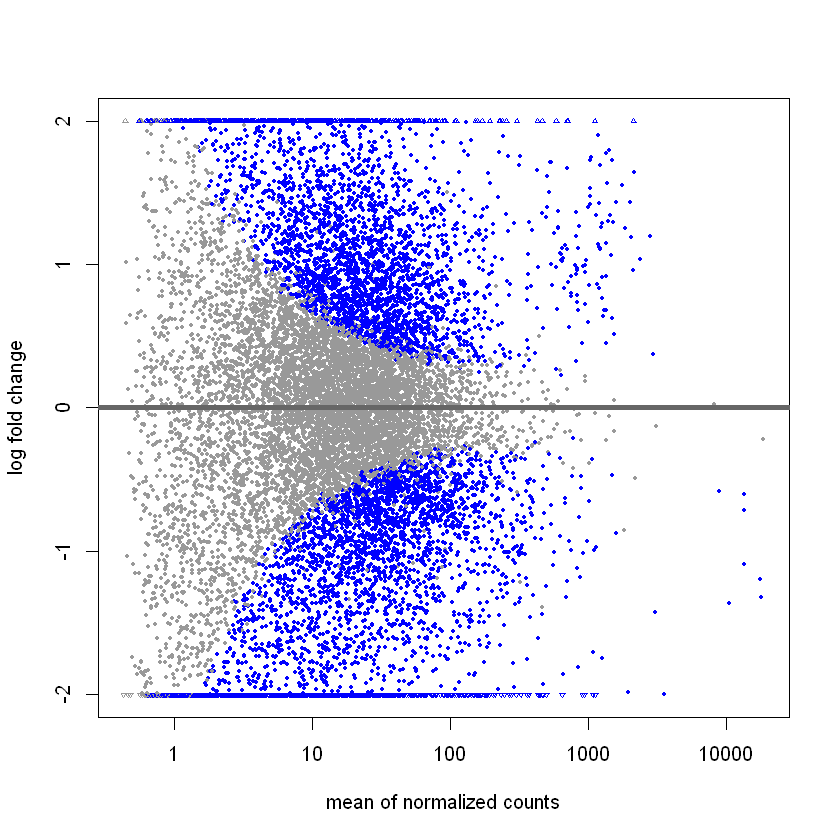

In [25]:
plotMA(res, ylim=c(-2,2))

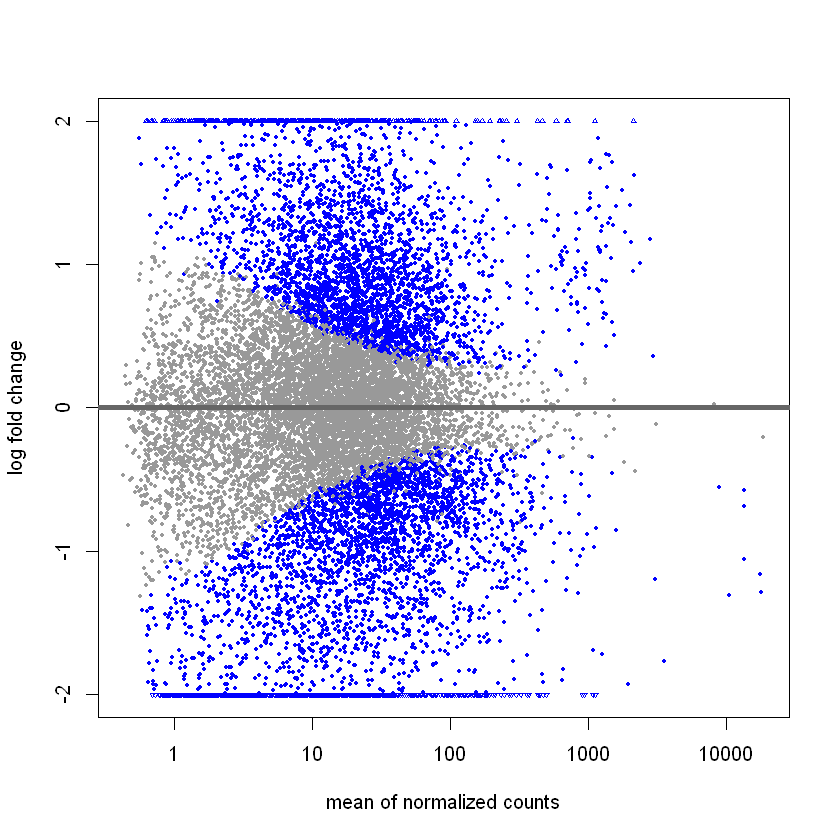

In [26]:
plotMA(resLFC, ylim=c(-2,2))

In [35]:
dif_exp_res <- data.frame(res)
head(dif_exp_res)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,32.362454,0.02649365,0.2493214,0.1062630,0.91537365,0.94683451
A2M,130.149774,-0.69654752,0.2831751,-2.4597771,0.01390233,0.03691309
A2ML1,1.779065,-1.83608103,1.0456235,-1.7559676,0.07909395,0.15191243
A4GALT,3.097964,-1.78063745,0.7084053,-2.5135856,0.01195108,0.03255010
AAAS,12.328293,0.06127976,0.2988355,0.2050619,0.83752380,0.89456169
AACS,30.112458,-0.50561909,0.2260070,-2.2371833,0.02527436,0.06033503


Warning message:
"Removed 12 rows containing missing values (`geom_point()`)."


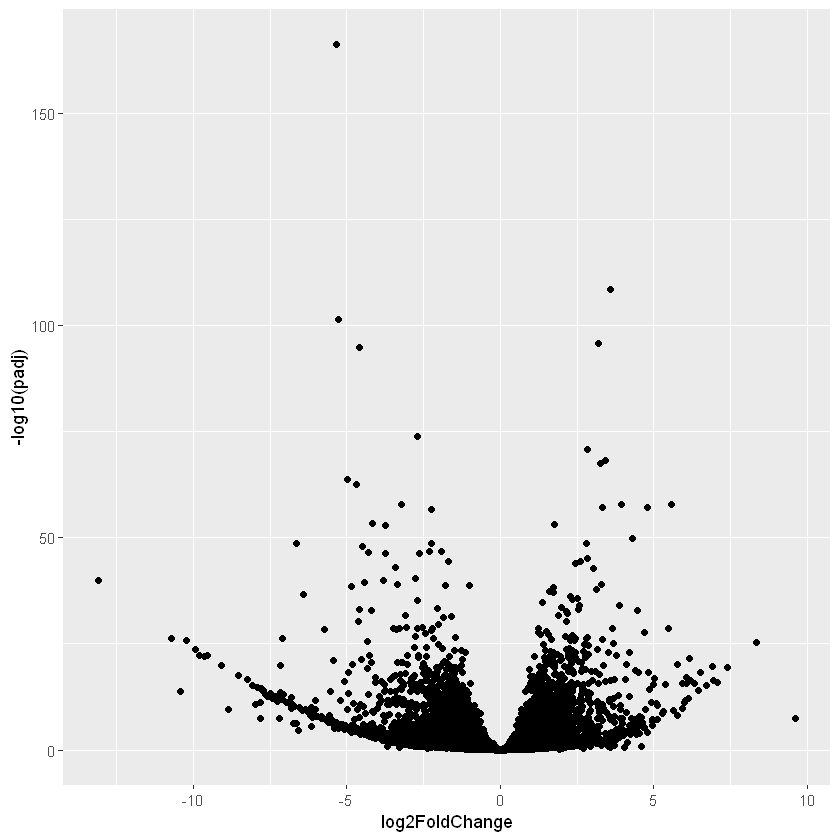

In [36]:
ggplot(dif_exp_res, aes(x=log2FoldChange,y=-log10(padj)))+
  geom_point()